# AB_PLOT :
    
    plot the results of fitting the simulated LCs, where input is known, and the real LCs, where it is not... 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd 
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import  hstack
from astropy.table import  vstack
from astropy.table import unique
from astropy.table import Column
from astropy.table import join
import celerite
import modules as mod
from matplotlib import rcParams 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

date = '190224'
prior='Jeff1'
#i = 5000
fname = date + '_Celerite_sim_and_real_'+prior+'.npy'
r = np.load(fname).item()

sims = list(r.keys())
sim  = 'simulated'# 

segments = list(r[sim].keys())

i= 1 

# sdss
d1 = pd.DataFrame.from_dict(r[sim][segments[0]])
t1 = Table.from_pandas(d1)

# sdss-ps1
d2 = pd.DataFrame.from_dict(r[sim][segments[1]])
t2 = Table.from_pandas(d2)

t12 =  join(t1,t2, keys='lcname', table_names=[segments[0] ,segments[1]])




sdss
sdss-ps1
sdss
sdss-ps1
Using  190224_Celerite_sim_and_real_Jeff1.npy
Saved as  Simulated_Jeff1-EXP-190224.png


/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


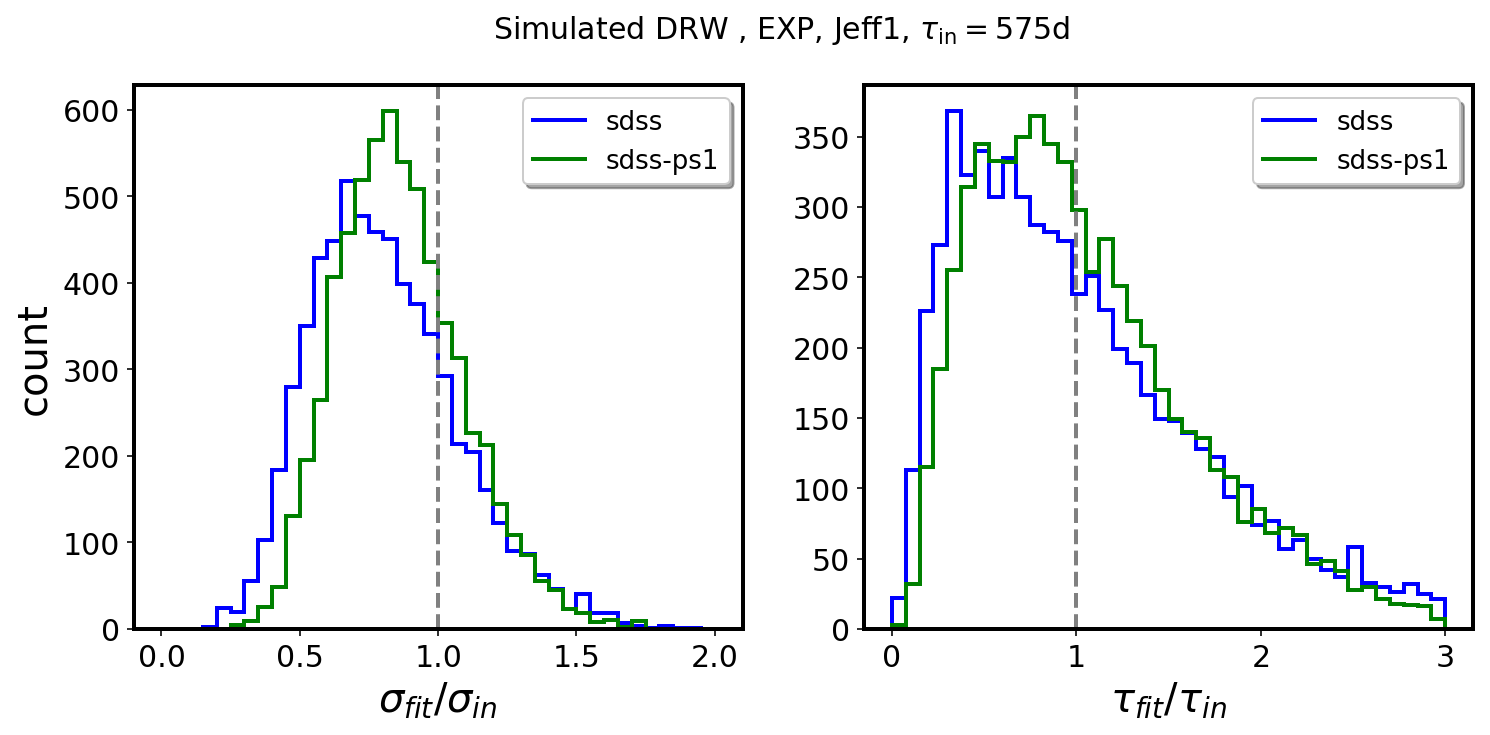

In [49]:
%matplotlib inline

import matplotlib.lines as mlines
#tall = t12 

# plot 

# select which results to plot 
fit = 'EXP'# 'MAP'#'EXP'# 'MAP'#'EXP'

# Input parameters for fitting ... 
SF_inf = 0.2  # mags 
sigma_in = SF_inf / np.sqrt(2)
tau_in = 575 # days 

fig,ax = plt.subplots(1,2, figsize=(12,5))
colors= ['blue','green', 'orange',  'red']

lw = 2 

i = 0 
ax_legend_handles =  []
for s in segments : 
    print(s)
    ax[0].hist(tall['sigma'+fit+'_'+s] / sigma_in , histtype='step', 
               bins=40, range=[0,2], color = colors[i],lw=lw) 
    ax[0].set_xlabel(r'$\sigma_{fit} / \sigma_{in}$')
    line = mlines.Line2D([], [],  color=colors[i], label=s,lw=lw)
    ax_legend_handles.append(line)
    i += 1 

ax[0].legend(loc='upper right', handles = ax_legend_handles,
             bbox_to_anchor=(1.0, 1.0),
             ncol=1, fancybox=True, shadow=True, fontsize=13 ) 
i = 0 
ax_legend_handles =  []
for s in segments : 
    print(s)
    ax[1].hist(tall['tau'+fit+'_'+s] / float(tau_in) , histtype='step', 
               bins=40, range=[0,3], color = colors[i],lw=lw) 
    ax[1].set_xlabel(r'$\tau_{fit} / \tau_{in}$')
    line = mlines.Line2D([], [],  color=colors[i], label=s,lw=lw)
    ax_legend_handles.append(line)
    i += 1 

ax[1].legend(loc='upper right', handles = ax_legend_handles,
             bbox_to_anchor=(1.0, 1.0),
             ncol=1, fancybox=True, shadow=True, fontsize=13 ) 
    
             
ax[0].axvline(1, lw=2, ls='--', c='grey')
ax[1].axvline(1, lw=2, ls='--', c='grey')

ax[0].set_ylabel('count')

fig.suptitle( 'Simulated DRW , '+ fit +', '+ prior+', '+\
             r'$\tau_{\mathrm{in}}=575 \mathrm{d}$' , 
             fontsize = 15)

figname = 'Simulated_'+prior+'-'+fit+'-'+date+'.png' 
print('Using ', fname)
print('Saved as ', figname)
plt.savefig(figname, bbox_inches="tight")

The median shift : 

In [30]:
a,b = tall['sigmaEXP_sdss-ps1'] / sigma_in , tall['sigmaEXP_sdss'] / sigma_in
print('< sigma(SDSS-PS1)/sigma_in - sigma(SDSS)/sigma_in> = ', np.mean(a-b))

a,b = tall['tauEXP_sdss-ps1'] / tau_in , tall['tauEXP_sdss'] / tau_in
print('< tau(SDSS-PS1)/tau_in - sigma(SDSS) / tau_in> = ', np.mean(a-b))

< sigma(SDSS-PS1)/sigma_in - sigma(SDSS)/sigma_in> =  0.05602685026251583
< tau(SDSS-PS1)/tau_in - sigma(SDSS) / tau_in> =  0.024391192303274


In [22]:
np.mean(a-b)

-0.05602685026251583

In [23]:
np.median(a) - np.median(b)

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


nan

In [28]:
np.sum(np.isnan(a.data))

0

Plot the ratios of sdss-ps1 to sdss .... 

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Median np.log10(sigma_sdss-ps1/sigma_sdss)= 0.015364919948576958
Mean np.log10(sigma_sdss-ps1/sigma_sdss)= 0.03790117679203939
Median np.log10(tau_sdss-ps1/tau_sdss)= -0.011020943280762236
Mean np.log10(tau_sdss-ps1/tau_sdss)= 0.03768454759208276


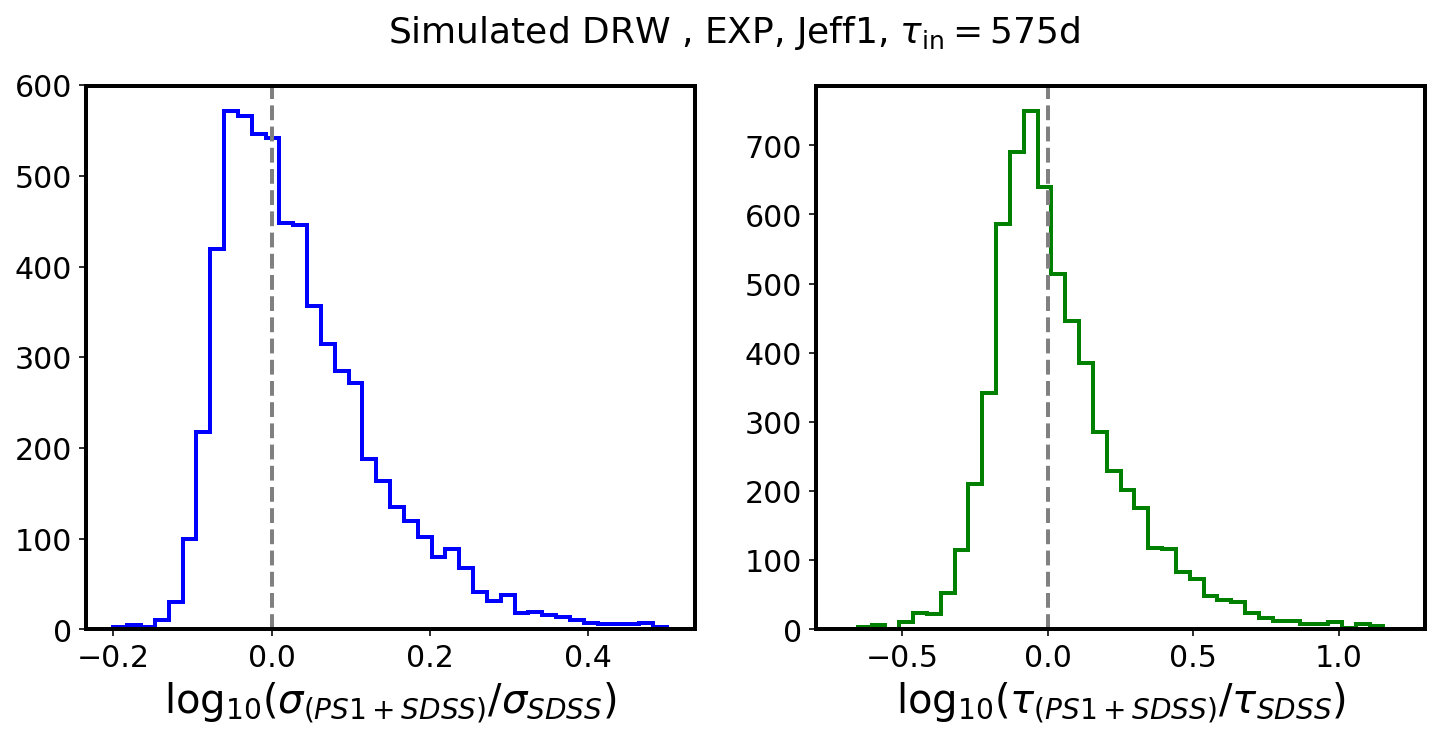

In [47]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

fit = 'EXP'

# Input parameters for fitting ... 
SF_inf = 0.2  # mags 
sigma_in = SF_inf / np.sqrt(2)
tau_in = 575 # days 


fig,ax = plt.subplots(1,2, figsize=(12,5))
colors= ['blue','green', 'orange',  'red']
ax_legend_handles =  []



labels =  {'sigma': r'$\log_{10}{(\sigma_{(PS1+SDSS)} / \sigma_{SDSS})}$',
         'tau':r'$\log_{10}{(\tau_{(PS1+SDSS)} / \tau_{SDSS})}$'}

i = 0
ranges = {'sigma':[-0.2,0.5], 'tau':[-0.7,1.2]}
for q in ['sigma','tau']:
    # selection : 
    m = (tall['tau'+fit+'_sdss-ps1'] > 5) & (tall['tau'+fit+'_sdss'] > 5) 
    
    # plot 
    x = tall[q+fit+'_sdss-ps1'][m] /  tall[q+fit+'_sdss'][m]
    ax[i].hist(np.log10(x) , histtype='step', 
               bins=40, range=ranges[q], color = colors[i],
               lw=2) 
    print('Median np.log10('+q+'_sdss-ps1/'+q+'_sdss'+')=', np.median(np.log10(x)))
    print('Mean np.log10('+q+'_sdss-ps1/'+q+'_sdss'+')=', np.mean(np.log10(x)))
    ax[i].set_xlabel(labels[q])
    ax[i].axvline(0, lw=2, ls='--', c='grey')

    i += 1 

fig.suptitle('Simulated DRW , '+ fit +', '+ prior+', '+\
             r'$\tau_{\mathrm{in}}=575 \mathrm{d}$' , fontsize=18
             )
plt.savefig('Celerite_simulated_DRW_EXP_compare_tau.png', bbox_inches="tight",
           dpi=150)